In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import time
from sklearn import neighbors 
from vast.voidfinder.voidfinder_functions import not_in_mask
import pickle

In [2]:
mask_file_name = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_main_mask.pickle"

In [3]:
temp_infile = open(mask_file_name, "rb")
mask, mask_resolution = pickle.load(temp_infile)
temp_infile.close()

In [4]:
file_name1 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_holes.txt"

In [5]:
data_table_MPA_holes = Table.read(file_name1, format = "ascii.commented_header")

In [6]:
file_name2 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_maximal.txt"

In [7]:
data_table_MPA_max = Table.read(file_name2, format = "ascii.commented_header")

In [8]:
file_name3 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_LOWZ_comoving_holes.txt"

In [9]:
data_table_LOWZ_holes = Table.read(file_name3, format = "ascii.commented_header")

In [10]:
file_name4 = "/Users/jordanconey/Documents/Summer_2021_REU/LOWZ_KIAS_Comp/kias1033_5_LOWZ_comoving_maximal.txt"

In [11]:
data_table_LOWZ_max = Table.read(file_name4, format = "ascii.commented_header")

In [12]:
data_table_MPA_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-219.9766885730029,55.94592863332258,135.83440145223284,21.95110162006994,0,264.519706381349,165.73067997975286,30.898137131105038
-262.97301589081854,-78.0620428087949,123.10641360359631,21.876257045873633,1,300.67204506660505,196.53322173210324,24.169504987853816
-209.2393054610766,-128.41862226940606,146.04767844766113,21.676996619726033,2,285.6612572179811,211.5391234240106,30.74791185165335
-233.6904384725772,112.45201691586905,106.65059297778195,21.269610821890087,3,280.4122431786187,154.30310477089623,22.354435414074697
-203.0956581165485,167.38486809752138,104.66285488783322,21.12429049841356,4,283.23109576296565,140.50575729206452,21.686735992041417
-164.4736258947223,-14.868764797054645,11.03921163979978,20.84360377724462,5,165.51289368256323,185.16561850710912,3.8242949431463615
-148.11476378155703,74.19692539372802,106.5660039111301,20.74034620068459,6,196.97583653213883,153.39178099729378,32.75245728606484
-161.60334916133954,95.9151905156753,237.93966516032103,20.48709350738816,7,303.2006769260679,149.30992441324952,51.69845674463693
-76.75901854682142,43.96911013189496,166.36715334524033,20.35402581850751,8,188.4230858633323,150.19505073037172,61.9996393863015


In [13]:
data_table_MPA_holes

x,y,z,radius,flag
float64,float64,float64,float64,int64
-133.75116962204893,49.173477280484086,270.19872739901473,23.02496784982688,0
-134.41648918898383,49.80191523472565,270.3543155988628,22.977833782535924,0
-131.02815447556276,48.046644793393035,272.55714060868485,22.96777355187413,0
-131.7480923011386,48.30576810786393,271.8531883218867,22.93518314947202,0
-135.2821088478816,50.979598715933676,271.30293552134503,22.86280134167585,0
-135.10067522671858,50.936032272639096,271.52538773215906,22.821204910294483,0
-128.57544368618264,45.77801170500754,274.7046795198888,22.79467985828839,0
-135.48044853669685,51.32429881798266,271.457432648458,22.788934068968818,0
-127.9793208430708,45.58263246807619,275.0130211441492,22.76161141779093,0


In [14]:
data_table_LOWZ_holes

x,y,z,radius,flag
float64,float64,float64,float64,int64
-257.29631137458625,-75.11564676740926,134.8332052410881,27.530064533128623,0
-262.4828168801113,-72.48103953015082,118.62252352011068,26.49771835502426,0
-262.5005935363379,-72.33954195961113,118.49537527114241,26.418705120119398,0
-227.30844177318664,55.90921010386288,139.21868311260044,26.291998860426123,1
-227.2835262732506,54.942887898633465,138.04528249083072,26.247561426558537,1
-260.2524169207296,-71.7028755186181,119.24788936683028,26.20391520253436,0
-263.434996162542,-73.32753704306099,117.8585756187685,26.201312116990973,0
-263.6305074322646,-73.5611166050323,118.07500103757998,26.14973402757511,0
-202.70306846900263,-128.78146198911642,142.6527112527934,26.136994526190758,2


In [15]:
data_table_LOWZ_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-257.29631137458625,-75.11564676740926,134.8332052410881,27.530064533128623,0,300.03957317633893,196.27475192646298,26.70421628517436
-227.30844177318664,55.90921010386288,139.21868311260044,26.291998860426123,1,272.3541980645768,166.18172034885725,30.741644448244994
-202.70306846900263,-128.78146198911642,142.6527112527934,26.136994526190758,2,279.3259653998823,212.42864142769088,30.710692083960637
-264.3938296504095,-55.125959840731674,93.86255213674605,25.998510509300054,3,285.92507287608595,191.7774087907294,19.16421423896934
-223.62586643236756,15.439409713248137,152.98677876260479,25.486157442735664,4,271.3887580318662,176.05049507400022,34.31332722447477
-146.29228173374884,-95.28164267698646,213.60680500632495,24.959173603989342,5,275.8765852171975,213.0766050358768,50.74015571186097
-201.83575571590526,163.0674467201877,111.85236538501563,23.95376383905574,6,282.5590488862016,141.06451002416244,23.31929853570458
-235.9819865140225,129.67069801907775,63.392211224858315,23.882398611483787,7,276.62349923286746,151.21146719055247,13.247871482937375
-158.5935175431125,95.05502944746921,235.0000905430129,23.451992289839986,8,299.0190712733571,149.063102494117,51.804304670114085


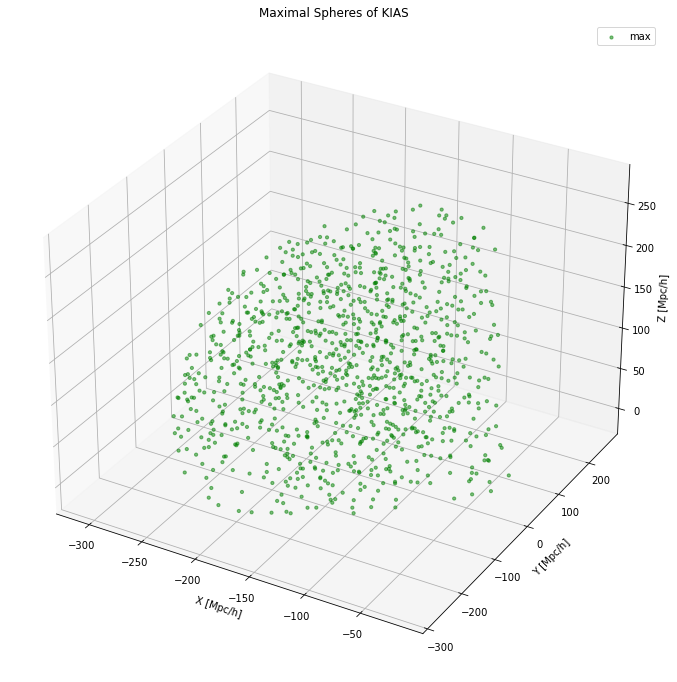

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_MPA_max['x'],data_table_MPA_max['y'], data_table_MPA_max['z'],
           color = 'green', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("Maximal Spheres of KIAS");

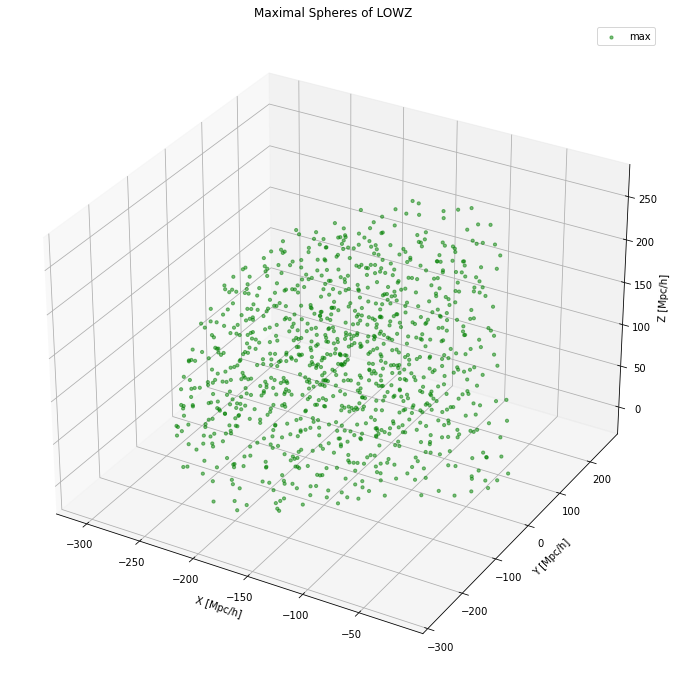

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_LOWZ_max['x'],data_table_LOWZ_max['y'], data_table_LOWZ_max['z'],
           color = 'green', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("Maximal Spheres of LOWZ");

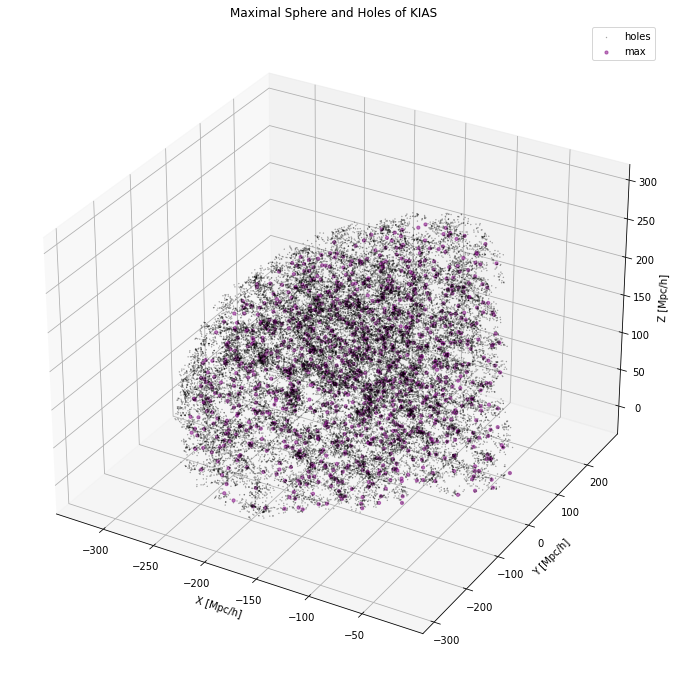

In [18]:
# p_size = 100
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table_MPA_holes['x'],data_table_MPA_holes['y'], data_table_MPA_holes['z'],
           color = 'black', s=0.1, alpha=0.5,
           label='holes')
ax.scatter(data_table_MPA_max['x'],data_table_MPA_max['y'], data_table_MPA_max['z'],
           color = 'purple', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)

plt.title("Maximal Sphere and Holes of KIAS");

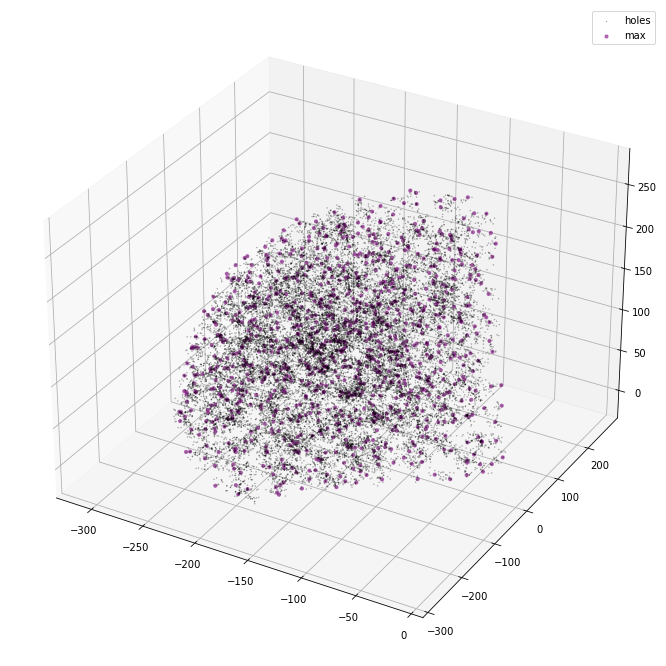

In [19]:
# p_size = 100
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table_LOWZ_holes['x'],data_table_LOWZ_holes['y'], data_table_LOWZ_holes['z'],
           color = 'black', s=0.1, alpha=0.5,
           label='holes')
ax.scatter(data_table_LOWZ_max['x'],data_table_LOWZ_max['y'], data_table_LOWZ_max['z'],
           color = 'purple', s=10, alpha=0.5,
           label='max')
# ax.set(xlabel='X [Mpc/h]',
#        ylabel='Y [Mpc/h]',
#        zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)

# plt.title("Maximal Sphere and Holes of LOWZ");

In [20]:
def calc_volume_boundaries(void_cat_A, void_cat_B):
    """Compute the boundaries of the minimal rectangular volume (parallelpiped)
    that completely contains two void catalogs.
    
    Parameters
    ----------
    void_cat_A : astropy.Table
        Table of void data from first catalog.
    void_cat_B : astropy.Table
        Table of void data from second catalog.
        
    Returns
    -------
    x_min : float
    x_max : float
    y_min : float
    y_max : float
    z_min : float
    z_max : float
    """
    x_min = np.minimum(np.min(void_cat_A['x']), np.min(void_cat_B['x']))
    x_max = np.maximum(np.max(void_cat_A['x']), np.max(void_cat_B['x']))
    
    y_min = np.minimum(np.min(void_cat_A['y']), np.min(void_cat_B['y']))
    y_max = np.maximum(np.max(void_cat_A['y']), np.max(void_cat_B['y']))

    z_min = np.minimum(np.min(void_cat_A['z']), np.min(void_cat_B['z']))
    z_max = np.maximum(np.max(void_cat_A['z']), np.max(void_cat_B['z']))

    return x_min, x_max, y_min, y_max, z_min, z_max

def generate_grid_points(x_min, x_max, y_min, y_max, z_min, z_max):
    """Creates a dense rectangular grid of points in 3D for the void volume calculation.
    
    Returns
    -------
    xyz : list
        2D list of points in 3D space.
    """
    x_range = np.arange(x_min, x_max)
    y_range = np.arange(y_min, y_max)
    z_range = np.arange(z_min, z_max)

    # Creating a meshgrid from the ranges to 
    X,Y,Z = np.meshgrid(x_range,y_range,z_range)

    x_points = np.ravel(X)
    y_points = np.ravel(Y)
    z_points = np.ravel(Z)
    
    point_coords = np.array([x_points, y_points, z_points])
    
    return point_coords

In [21]:
#This line creates the boundaries (like the whole min and max)
xmin, xmax, ymin, ymax, zmin, zmax = calc_volume_boundaries(data_table_MPA_max, data_table_LOWZ_max)

#This line makes creates the points in between 
pts = generate_grid_points(xmin, xmax, ymin, ymax, zmin, zmax)

b = pts.shape
print(b)

(3, 45368640)


In [22]:
# This is the cell to filter out all the points that we do not want 🥴
start_time = time.time()

rmin = 0
rmax = 312.89816

points_boolean = np.ones(pts.shape[1], dtype = bool)

print(time.time() - start_time)

start_time = time.time()
for i in range(pts.shape[1]):
    
    #   print(pts[:,i].reshape((1,3)).shape)
    #   print(pts[:,i].reshape((1,3)))
    #   print(pts[:,i])
    points_boolean[i] = not_in_mask(pts[:,i].reshape((1,3)), mask, mask_resolution, rmin, rmax)        


points_in_mask = pts[:,~points_boolean]
print(time.time() - start_time)
print(points_in_mask.shape)
print(np.sum(points_boolean))
print(np.sum(~points_boolean))
print(points_boolean.shape)

0.024946928024291992


KeyboardInterrupt: 

In [ ]:
#8,000,000
#22,843,215
# should give me my good cone shape
start_time = time.time()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(points_in_mask[0,:],points_in_mask[1,:], points_in_mask[2,:],
           color = 'blue', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

plt.title("Points in Mask");
print(time.time() - start_time)

In [ ]:
def point_query(point_coords, void_cat):
    """We are creating a function to make a KDTree to find the number of points in 
    and out of a catalogue.
    
    Parameters
    ----------
    point_coords: ndarray has a shape of (3,N)
        This is the list of points to query the given void catalogue. N is the number of points given. 
    void_cat: Astropy Table
        This is the given void catalogue.
    
    Returns
    -------
    true_inside: ndarray of shape (N,1)
        Is this the boolean array of length N (same length as point_coords). True means that 1 point 
        is inside the hole.
    """
    
    cx = void_cat['x']
    cy = void_cat['y']
    cz = void_cat['z']

    sphere_coords = np.array([cx, cy, cz])

    start_time = time.time()

    #The .T is meant to transpose the array from (3,1054) to (1054,3)
    sphere_tree = neighbors.KDTree(sphere_coords.T)

    print(time.time() - start_time)

    start_time = time.time()

    dist, idx = sphere_tree.query(point_coords.T, k = 1)

    true_inside = dist < void_cat['radius'][idx]
    
    return true_inside

In [ ]:
start_time = time.time()

true_inside_MPA = point_query(points_in_mask, data_table_MPA_holes)

count_in_KIAS = np.sum(true_inside_MPA)

# The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
count_out_KIAS = np.sum(~true_inside_MPA)
print(time.time() - start_time)

total_KIAS = count_in_KIAS + count_out_KIAS

true_inside_LOWZ = point_query(points_in_mask, data_table_LOWZ_holes)

count_in_LOWZ = np.sum(true_inside_LOWZ)

# The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
count_out_LOWZ = np.sum(~true_inside_LOWZ)

total_LOWZ = count_in_LOWZ + count_out_LOWZ

print(time.time() - start_time)
print('\nNumber of points inside KIAS max: {}'.format(count_in_KIAS))
print('\nNumber of points outside KIAS max: {}'.format(count_out_KIAS))
print('\nNumber of points inside LOWZ max: {}'.format(count_in_LOWZ))
print('\nNumber of points outside LOWZ max: {}'.format(count_out_LOWZ))
print("\nThis is the total number of points KIAS: {}".format(total_KIAS))
print("\nThis is the total number of points in LOWZ: {}".format(total_LOWZ))

## This is the number of points that are inside both A and B

In [ ]:
inside_A_and_B = np.logical_and(true_inside_MPA, true_inside_LOWZ)

np.sum(inside_A_and_B), count_in_KIAS, count_in_LOWZ

## This is the number of points that are in neither A and B

In [ ]:
not_inside_A_and_B = np.logical_and(~true_inside_MPA, ~true_inside_LOWZ)

np.sum(not_inside_A_and_B), count_in_KIAS, count_in_LOWZ

## This is the number of points that are in A but not B

In [ ]:
inside_A = np.logical_and(true_inside_MPA, ~true_inside_LOWZ)

np.sum(inside_A)

## This is the number of points that are not in A but are in B

In [ ]:
inside_B = np.logical_and(~true_inside_MPA, true_inside_LOWZ)

np.sum(inside_B)

# Fraction of points: Calculate the ratios of the given sums

- in A
- in B
- in A & B
- in neither A nor B
- {in A, not B
- {in B, not A
-   |
-   |
- \ /
- The closer they are to zero, the more similar they are

## This is the ratio of A

In [ ]:
r_A = count_in_KIAS / total_KIAS
print(r_A)

## This is the ratio of B

In [ ]:
r_B = count_in_LOWZ / total_KIAS
print(r_B)

## This is the ratio of both A and B

In [ ]:
r_AB = np.sum(inside_A_and_B) / total_KIAS
print(r_AB)

## This is the ratio of neither A nor B

In [ ]:
r_notAB = np.sum(not_inside_A_and_B) / total_KIAS
print(r_notAB)

## This is the ratio of A and not B

In [ ]:
r_A_not_B = np.sum(inside_A) / total_KIAS
print(r_A_not_B)

## This is the ratio of B and not A

In [ ]:
r_B_not_A = np.sum(inside_B) / total_KIAS
print(r_B_not_A)

In [ ]:
Sum = r_AB + r_notAB + r_A_not_B + r_B_not_A

In [ ]:
Sum